## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-
-

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

In [1]:
import random
import time
import matplotlib.pyplot as plt

In [2]:
# Function to generate random text of specified length
def generate_random_text(length):
    letters = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    return ''.join(random.choice(letters) for _ in range(length))

def take_text(len):
  with open('./1984.txt', 'r', encoding='UTF-8') as file:
    content = file.read().replace('\n', ' ')
    # print(content)
  return content[:len]

# Function to calculate compression ratio
def calculate_compression_ratio(original_size, compressed_size):
    return (compressed_size / original_size)*100

def _list2text(encoded):
    return '︙'.join(['︙'.join(map(str,x)) for x in encoded])

def _text2list(text:str):
    text = text.split('︙')
    return [(int(text[x]), int(text[x+1]), text[x+2]) for x in range(0, len(text), 3)]

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [3]:
class Node:
    def __init__(self, val, l_son = None, r_son = None) -> None:
        self.val = val
        self.l_son = l_son
        self.r_son = r_son

    def __str__(self) -> str:
        return str(self.__dict__)

    def __repr__(self) -> str:
        return str(self.__dict__)

    def encode_it(self, num = '', dct_ = None) -> str:
        if dct_ is None:
            dct_ = {}
        if isinstance(self.l_son, Node):
            num += '1'
            self.l_son.encode_it(num, dct_)
            num = num[:-1]
        else:
            dct_[self.l_son[0]] = num + '1'
        if isinstance(self.r_son, Node):
            num += '0'
            self.r_son.encode_it(num, dct_)
            num = num[:-1]
        else:
            if self.r_son:
                dct_[self.r_son[0]] = num + '0'
        return dict(sorted(list(dct_.items()), key=lambda x: x[1], reverse=True))



class Huffman:
    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        lst_pos = []
        res = ''
        leng = len(text)
        for symb in set(text):
            lst_pos.append((symb, round(text.count(symb)/leng, 3)))
        while len(lst_pos) > 2:
            lst_pos = sorted(lst_pos, key=lambda x: -x[1] if isinstance(x, tuple) else x.val)
            min_1 = min(lst_pos, key=lambda x: x[1] if isinstance(x, tuple) else x.val)
            min_2 = min(lst_pos[:lst_pos.index(min_1)]+lst_pos[lst_pos.index(min_1)+1:], key=lambda x: x[1] if isinstance(x, tuple) else x.val)
            lst_pos.remove(min_1)
            lst_pos.remove(min_2)

            # print(min_1, min_2)
            new_node = Node(round((min_1[1] if isinstance(min_1, tuple) else min_1.val) + (min_2[1] if isinstance(min_2, tuple) else min_2.val), 4), min_1, min_2)
            lst_pos.append(new_node)
            # print(lst_pos)
            # print(new_node)

        lst_pos = sorted(lst_pos, key=lambda x: -x[1] if isinstance(x, tuple) else x.val)
        # print(lst_pos)
        min_1 = min(lst_pos, key=lambda x: x[1] if isinstance(x, tuple) else x.val)

        if len(lst_pos) > 1:
            min_2 = min(lst_pos[:lst_pos.index(min_1)]+lst_pos[lst_pos.index(min_1)+1:], key=lambda x: x[1] if isinstance(x, tuple) else x.val)
            lst_pos.remove(min_1)
            lst_pos.remove(min_2)

            # print(min_1, min_2)
            new_node = Node(round((min_1[1] if isinstance(min_1, tuple) else min_1.val) + (min_2[1] if isinstance(min_2, tuple) else min_2.val), 4), min_1, min_2)

            # print(f'new_node: {new_node}')

            dict_code = new_node.encode_it()
        else:
            dict_code = Node(min_1[1], min_1).encode_it()

        # print(dict_code)

        for symb in text:
            res += dict_code[symb]

        return res, dict_code


    def decode(self, code: str, coding_dict: dict[str, str]):

        # print(code, coding_dict, len(min(coding_dict.values(), key=len)))
        # print(range(len(min(coding_dict.values(), key=len)),len(max(coding_dict.values(), key=len))+1))
        len_min, len_max = len(min(coding_dict.values(), key=len)), len(max(coding_dict.values(), key=len))+1

        coding_dict = {val:key for key, val in coding_dict.items()}



        ind_ = 0
        res = ''
        while ind_ < len(code):
            for offset_ in range(len_min,len_max):
                # print(f'offset: {offset_}')
                el_dec = code[ind_:ind_+offset_]
                # print(el_dec)

                if el_dec in coding_dict:
                    res += coding_dict[el_dec]
                    ind_ += len(el_dec)
                    break

        return res

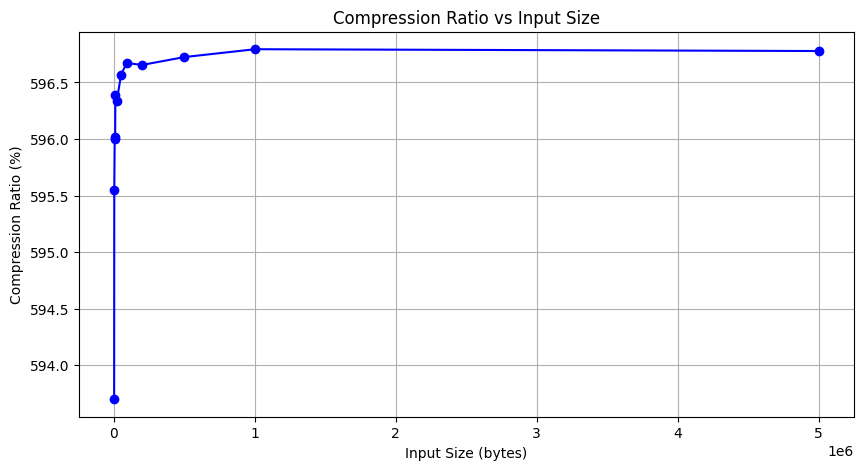

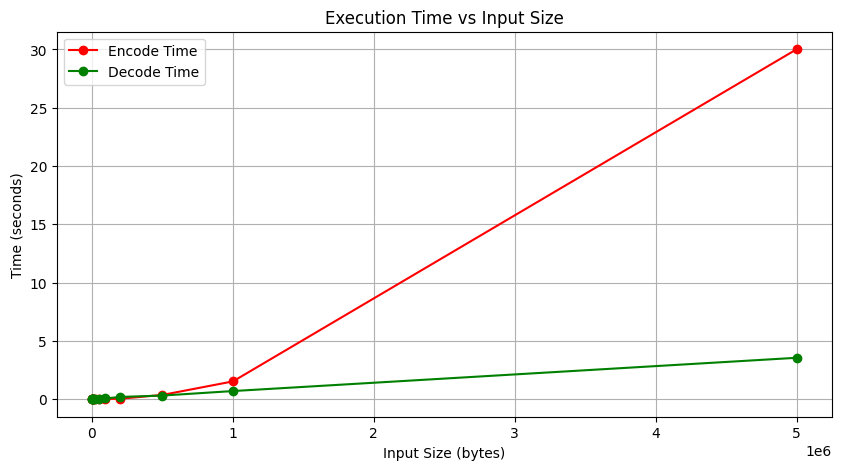

In [4]:
# Function to measure execution time of encoding and decoding
def measure_execution_time(input_size):
    huff = Huffman()
    text = generate_random_text(input_size)
    # text = take_text(input_size)

    start_encode = time.time()
    encoded_result, dictio = huff.encode(text)
    # print(encoded_result)
    end_encode = time.time()

    start_decode = time.time()
    decoded_result = huff.decode(encoded_result, dictio)
    end_decode = time.time()

    encode_time = end_encode - start_encode
    decode_time = end_decode - start_decode

    # assert text == decoded_result

    return encode_time, decode_time, len(text), len(encoded_result)

# Input sizes for investigation
input_sizes = [1000, 2000, 5000, 8000, 10000, 20000, 50000, 90000, 200000, 500000, 1000000, 5000000]

# Lists to store results
compression_ratios = []
encode_times = []
decode_times = []

# Investigating different input sizes
for size in input_sizes:
    encode_time, decode_time, original_size, compressed_size = measure_execution_time(size)

    compression_ratio = calculate_compression_ratio(original_size, compressed_size)

    compression_ratios.append(compression_ratio)
    encode_times.append(encode_time)
    decode_times.append(decode_time)

# Plotting compression ratio vs input size
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, compression_ratios, marker='o', color='blue')
plt.title('Compression Ratio vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Compression Ratio (%)')
plt.grid(True)
plt.show()

# Plotting execution time vs input size
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, encode_times, marker='o', color='red', label='Encode Time')
plt.plot(input_sizes, decode_times, marker='o', color='green', label='Decode Time')
plt.title('Execution Time vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Алгоритм LZW

In [5]:
class LZW:

    def __dictio(self, message:str):
        """initialize dictionary"""
        result = []
        for char in message:
            if char not in result:
                result.append(char)
        return result

    def encode(self, message: str) -> tuple[str, list]:
      '''encode message'''
      dictionary = self.__dictio(message)
      index = 0
      result = []
      sub, char = '', ''
      while index < len(message):
          char = message[index]
          if sub+char in dictionary:
              sub = sub+char
          else:
              result.append(dictionary.index(sub))
              dictionary.append((sub+char))
              sub = char
          index += 1

      mes = ''.join([dictionary[x] for x in result])
      if mes != message:
          ost = message.replace(mes, '')
          result.append(dictionary.index(ost))

      return (result, self.__dictio(message))

    def decode(self, code: str, first_dict: list) -> str:
      '''decode message'''
      result = ''
      current_code = code[0]
      result += first_dict[current_code]

      for code in code[1:]:
          if code < len(first_dict):
              entry = first_dict[code]
          elif code == len(first_dict):
              entry = first_dict[current_code] + first_dict[current_code][0]
          else:
              raise ValueError("Invalid code in encoded list")
          result += entry
          first_dict.append(first_dict[current_code] + entry[0])
          current_code = code
      return result



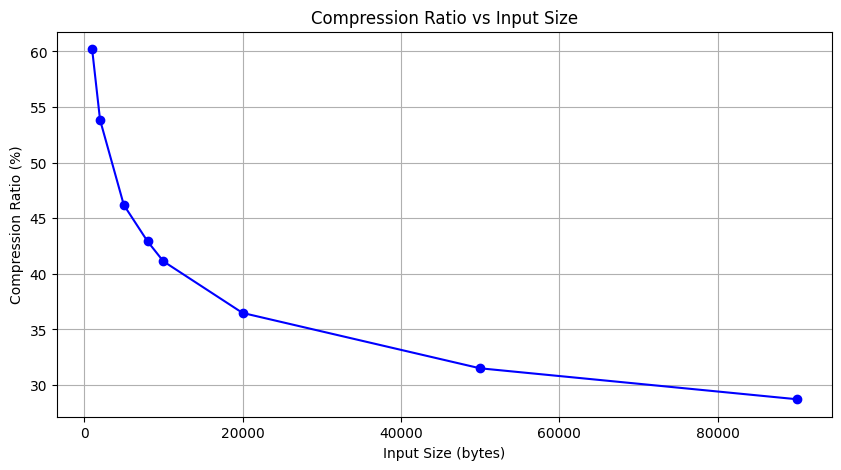

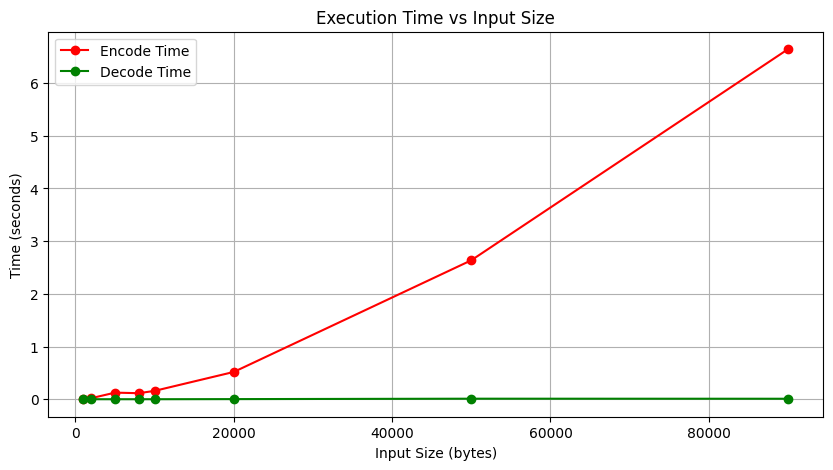

In [6]:
# Function to measure execution time of encoding and decoding
def measure_execution_time(input_size):
    lzw = LZW()
    # text = generate_random_text(input_size)
    text = take_text(input_size)

    start_encode = time.time()
    encoded_result, dictio = lzw.encode(text)
    # print(encoded_result)
    end_encode = time.time()

    start_decode = time.time()
    decoded_result = lzw.decode(encoded_result, dictio)
    end_decode = time.time()

    encode_time = end_encode - start_encode
    decode_time = end_decode - start_decode

    return encode_time, decode_time, len(text), len(encoded_result)

# Input sizes for investigation
input_sizes = [1000, 2000, 5000, 8000, 10000, 20000, 50000, 90000]

# Lists to store results
compression_ratios = []
encode_times = []
decode_times = []

# Investigating different input sizes
for size in input_sizes:
    encode_time, decode_time, original_size, compressed_size = measure_execution_time(size)

    compression_ratio = calculate_compression_ratio(original_size, compressed_size)

    compression_ratios.append(compression_ratio)
    encode_times.append(encode_time)
    decode_times.append(decode_time)

# Plotting compression ratio vs input size
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, compression_ratios, marker='o', color='blue')
plt.title('Compression Ratio vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Compression Ratio (%)')
plt.grid(True)
plt.show()

# Plotting execution time vs input size
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, encode_times, marker='o', color='red', label='Encode Time')
plt.plot(input_sizes, decode_times, marker='o', color='green', label='Decode Time')
plt.title('Execution Time vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [7]:
class LZ77:
  def __init__(self, buffer:int) -> None:
        self.buffer = buffer if buffer > 0 else 5

  def encode(self, message):
        result = []
        index = 0

        while index < len(message):
            best_offset = -1
            best_length = -1
            best_match = ''

            for length in range(1, len(message) - index):
                substring = message[index:index + length]
                offset = message.rfind(substring, max(0, index - self.buffer), index)

                if offset != -1 and length > best_length:
                    best_offset = index - offset
                    best_length = length
                    best_match = substring

            if best_match:
                result.append((best_offset, best_length, message[index + best_length]))
                index += best_length + 1
            else:
                result.append((0, 0, message[index]))
                index += 1
        return _list2text(result)

  def decode(self, code):
        code = _text2list(code)
        message = ''
        for i in code:
            if i[0] == 0:
                message += str(i[2])
            else:
                start_index = len(message) - i[0]
                message += message[start_index:start_index + i[1]] + i[2]

        return message

size_buffer: 5
size_buffer: 10
size_buffer: 20
size_buffer: 50
size_buffer: 100
size_buffer: 200
size_buffer: 500
size_buffer: 1000
[1000, 3000, 5000, 8000] [998.1, 1014.7, 1008.6600000000001, 1001.8125]
[1000, 3000, 5000, 8000] [816.4999999999999, 834.3, 833.3000000000001, 831.3874999999999]
[1000, 3000, 5000, 8000] [713.5, 729.1666666666667, 726.4599999999999, 725.5124999999999]
[1000, 3000, 5000, 8000] [608.3000000000001, 624.0333333333333, 618.82, 617.3125]
[1000, 3000, 5000, 8000] [556.5, 557.4333333333334, 551.94, 549.7375]
[1000, 3000, 5000, 8000] [518.3, 519.7666666666667, 510.14, 507.48749999999995]
[1000, 3000, 5000, 8000] [488.5, 471.76666666666665, 463.65999999999997, 459.2875]
[1000, 3000, 5000, 8000] [475.5, 440.09999999999997, 430.41999999999996, 425.5875]


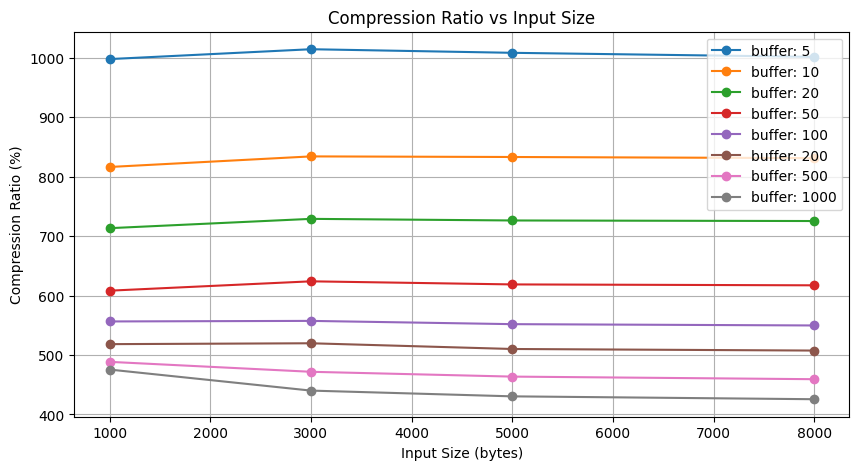

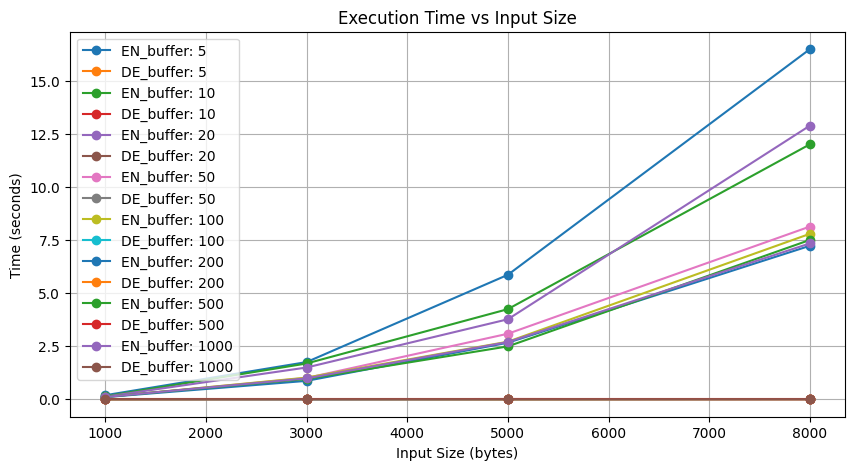

In [8]:


# Function to measure execution time of encoding and decoding
def measure_execution_time(input_size, size_buffer):
    lz77 = LZ77(size_buffer)
    # text = generate_random_text(input_size)
    text = take_text(input_size)

    start_encode = time.time()
    encoded_result = lz77.encode(text)
    end_encode = time.time()

    start_decode = time.time()
    decoded_result = lz77.decode(encoded_result)
    end_decode = time.time()

    encode_time = end_encode - start_encode
    decode_time = end_decode - start_decode

    assert text == decoded_result

    return encode_time, decode_time, len(text), len(_list2text(encoded_result))


# Input sizes for investigation
input_sizes = [1000, 3000, 5000, 8000]
input_buffer = [5,10,20,50,100,200,500,1000]

list_of_ratios = []
list_of_encoded = []
list_of_decoded = []

# Investigating different input sizes
for size_buffer in input_buffer:
  print(f'size_buffer: {size_buffer}')
  # Lists to store results
  compression_ratios = []
  encode_times = []
  decode_times = []
  for size in input_sizes:
    encode_time, decode_time, original_size, compressed_size = measure_execution_time(size, size_buffer)

    compression_ratio = calculate_compression_ratio(original_size, compressed_size)

    compression_ratios.append(compression_ratio)
    encode_times.append(encode_time)
    decode_times.append(decode_time)

  list_of_ratios.append(compression_ratios)
  list_of_encoded.append(encode_times)
  list_of_decoded.append(decode_times)

# Plotting compression ratio vs input size
plt.figure(figsize=(10, 5))
for count in range(len(list_of_ratios)):
  print(input_sizes, list_of_ratios[count])
  plt.plot(input_sizes, list_of_ratios[count], marker='o', label=f"buffer: {input_buffer[count]}")
  plt.title('Compression Ratio vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Compression Ratio (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting execution time vs input size
plt.figure(figsize=(10, 5))
for count in range(len(list_of_ratios)):

  plt.plot(input_sizes, list_of_encoded[count], marker='o',label=f"EN_buffer: {input_buffer[count]}")
  plt.plot(input_sizes, list_of_decoded[count], marker='o',label=f"DE_buffer: {input_buffer[count]}")
plt.title('Execution Time vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Алгоритм Deflate

In [9]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer = 5 if not isinstance(buffer_size, int) or buffer_size <= 0 else buffer_size
        self.lz77 = LZ77(self.buffer)
        self.huff = Huffman()

    def encode(self, text: str) -> str:
        return self.huff.encode(self.lz77.encode(text))

    def decode(self, code: str, dct: dict) -> str:
        return self.lz77.decode(self.huff.decode(code, dct))

size_buffer: 5
size_buffer: 10
size_buffer: 20
size_buffer: 50
size_buffer: 100
size_buffer: 200
size_buffer: 500
size_buffer: 1000
[1000, 2000, 5000, 8000] [1307.3, 1326.3999999999999, 1334.2, 1330.8249999999998]
[1000, 2000, 5000, 8000] [1209.6, 1231.45, 1242.6399999999999, 1241.525]
[1000, 2000, 5000, 8000] [1118.1, 1147.2, 1149.18, 1149.725]
[1000, 2000, 5000, 8000] [1003.5999999999999, 1033.6000000000001, 1035.28, 1036.45]
[1000, 2000, 5000, 8000] [948.6, 957.8, 954.5799999999999, 953.875]
[1000, 2000, 5000, 8000] [892.2, 897.7, 891.22, 890.3874999999999]
[1000, 2000, 5000, 8000] [855.8, 843.35, 833.36, 828.75]
[1000, 2000, 5000, 8000] [840.4, 796.3, 784.24, 778.125]


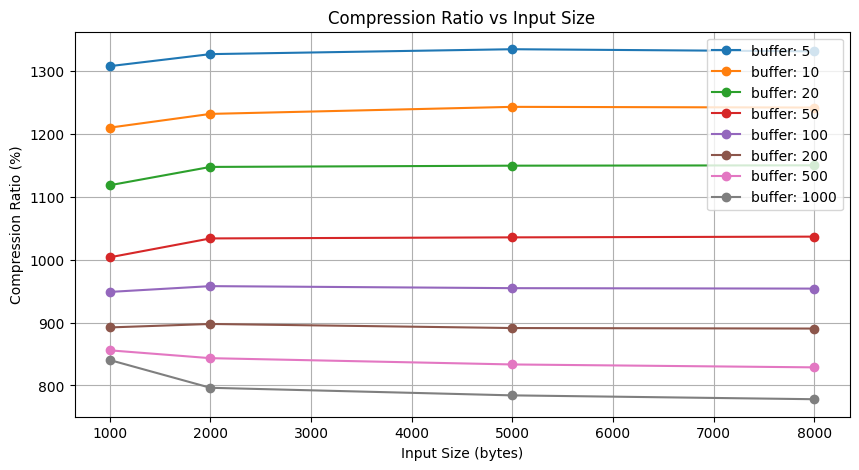

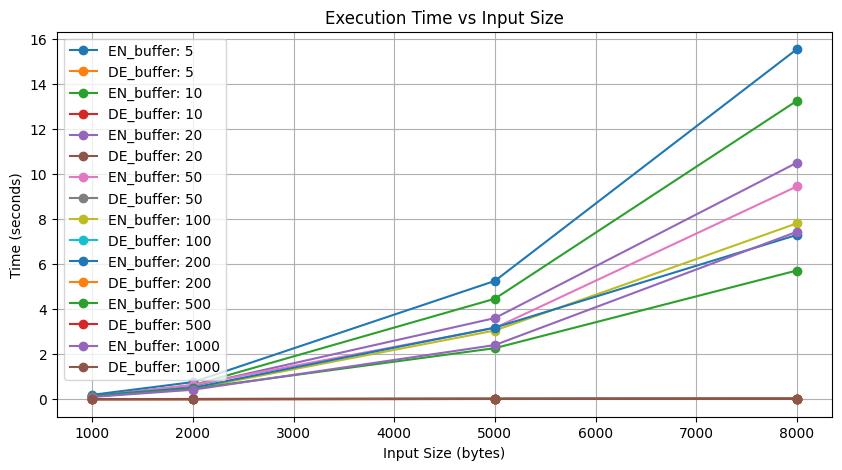

In [10]:
# Function to measure execution time of encoding and decoding
def measure_execution_time(input_size, size_buffer):
    deflate = Deflate(size_buffer)
    # text = generate_random_text(input_size)
    text = take_text(input_size)

    start_encode = time.time()
    encoded_result, dictio = deflate.encode(text)
    # print(len(encoded_result))
    end_encode = time.time()

    start_decode = time.time()
    decoded_result = deflate.decode(encoded_result, dictio)
    end_decode = time.time()

    encode_time = end_encode - start_encode
    decode_time = end_decode - start_decode

    assert text == decoded_result

    return encode_time, decode_time, len(text), len(encoded_result)

plt.figure(figsize=(10, 5))
# Input sizes for investigation
input_sizes = [1000, 2000, 5000, 8000]
input_buffer = [5,10,20,50,100,200,500,1000]

list_of_ratios = []
list_of_encoded = []
list_of_decoded = []

# Investigating different input sizes
for size_buffer in input_buffer:
  print(f'size_buffer: {size_buffer}')
  # Lists to store results
  compression_ratios = []
  encode_times = []
  decode_times = []
  for size in input_sizes:
    encode_time, decode_time, original_size, compressed_size = measure_execution_time(size, size_buffer)

    compression_ratio = calculate_compression_ratio(original_size, compressed_size)

    compression_ratios.append(compression_ratio)
    encode_times.append(encode_time)
    decode_times.append(decode_time)

  list_of_ratios.append(compression_ratios)
  list_of_encoded.append(encode_times)
  list_of_decoded.append(decode_times)


# Plotting compression ratio vs input size

for count in range(len(list_of_ratios)):
  print(input_sizes, list_of_ratios[count])
  plt.plot(input_sizes, list_of_ratios[count], marker='o', label=f"buffer: {input_buffer[count]}")
  plt.title('Compression Ratio vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Compression Ratio (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting execution time vs input size
plt.figure(figsize=(10, 5))
for count in range(len(list_of_ratios)):

  plt.plot(input_sizes, list_of_encoded[count], marker='o',label=f"EN_buffer: {input_buffer[count]}")
  plt.plot(input_sizes, list_of_decoded[count], marker='o',label=f"DE_buffer: {input_buffer[count]}")
plt.title('Execution Time vs Input Size')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

ВИСНОВКИ

LZ77 був попередником LZW, тому він вимагає більше памяті, та загалом трохи складніший. Працюють шляхом вилучення зайвої інформації та використання властивостей повторюваності даних. Загалом якщо порівнювати ці два алгоритми, то LZW здається цікавішим і більш швидким та легким. Але всеодно потрібно правильно підбирати алгоритм, враховуючи характеристики даних, потреби в продуктивності та обсяг памєяті.
________________________________

Алгоритм Гаффмана забезпечує високий ступінь стиснення і має прийнятний час кодування та декодування, що робить його відмінним вибором для застосування у різних областях, включаючи зберігання даних, передачу по мережі та обробку текстової інформації.
________________________________

У алгоритмі Deflate використовується алгоритм LZ77 для знаходження повторюваних фрагментів даних і створення посилань на них, а потім використовується алгоритм Гаффмана для стиснення кодів знайдених фрагментів. Це дозволяє досягти хорошої ефективності стиснення шляхом використання переваг кожного з цих алгоритмів.
_________________________________
Фінальні висновки
-----
Для великої кількості даних, що повторюються, найкращий вибір - це LZ77 або Deflate. овни працюватимуть ефективно, оскільки в їхню основу закладено працбвати з повторюваними даними.

Дані з великою кількістю унікальних символів або короткі послідовності - LZW або Гаффман. Вони кодують короткі послідовності або набори даних з великою кількістю унікальних символів, які не мають значної кількості повторюваних фрагментів.
-----
Це нам показує, що в першу чергу важливо розуміти ціль нашої програми, так як кожен алгоритм має свої плюси та мінуси, тоді підібрати алгоритми, які можуть її виконати та вибрати з них, ті що найбільше підходять до нашого завдання. Саме це є найбільш правильним підходом для оптимізонваного вирішення проблема.